In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/pvannyamelia/bangkit_2021_capstone_Rangkayo/main/violence_data.csv")

df.dropna(inplace=True)

df.drop(columns=['RecordID', 'Survey Year'], inplace=True)
df.columns = ['country', 'gender', 'dmg_question', 'dmg_response', 'question', 'value']

dupl = list(df[df.duplicated()==True].index)
df.drop(df.index[dupl], inplace=True)

df.head()

,country,gender,dmg_question,dmg_response,question,value
1,Afghanistan,F,Education,Higher,... if she burns the food,10.1
2,Afghanistan,F,Education,Secondary,... if she burns the food,13.7
3,Afghanistan,F,Education,Primary,... if she burns the food,13.8
4,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,13.8
5,Afghanistan,F,Employment,Employed for kind,... if she burns the food,17.0


In [12]:
le = LabelEncoder()
for i in ['country', 'gender', 'dmg_question', 'dmg_response', 'question']:
  df[i] = le.fit_transform(df[i])
df.head()

,country,gender,dmg_question,dmg_response,question,value
1,0,0,1,5,2,10.1
2,0,0,1,11,2,13.7
3,0,0,1,9,2,13.8
4,0,0,3,14,2,13.8
5,0,0,2,4,2,17.0


Text(0.5, 1.0, 'Correlation Between Variables')

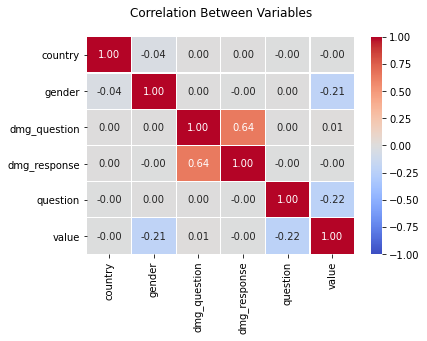

In [13]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'coolwarm', annot=True, fmt='.2f', linewidths=0.1)
plt.title("Correlation Between Variables", pad=20)

In [14]:
df.drop(columns=['country', 'dmg_question', 'dmg_response'], inplace=True)

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr_re = LinearRegression()
lr_re.fit(X_train, y_train)
print("Intercept: ", lr_re.intercept_)
print("Coefficient: ", lr_re.coef_)

lm_re = smf.ols(formula='value~gender+question', data=df).fit()
print('Summary: ', lm_re.summary())

y_pred_re = lr_re.predict(X_test)

print('Model Score: ', lr_re.score(X_test, y_test))
print("RMSE number is: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_re)))

Intercept:  28.2500380710783
Coefficient:  [-6.57592882 -2.16674696]
Summary:                              OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     559.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          3.79e-232
Time:                        10:11:33   Log-Likelihood:                -47026.
No. Observations:               11187   AIC:                         9.406e+04
Df Residuals:                   11184   BIC:                         9.408e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [22]:
while True:
    jk = input ("\nWhat is your gender: F) Female. M) Male. [M/F]? : ")
    if jk in ['M', 'F']:
      jk=le.fit_transform([jk])
      break
    else:
      print("\nPlease only enter M/F, it is sensitive case")

while True:
    question = input ("\nWhich one of these statements do you most agree?\n1. A husband is justified in hitting or beating his wife for at least one specific reason.\n2. A husband is justified in hitting or beating his wife if she argues with him.\n3. A husband is justified in hitting or beating his wife if she burns the food\n4. A husband is justified in hitting or beating his wife if she goes out without telling him\n5. A husband is justified in hitting or beating his wife if she neglects the children.\n6. A husband is justified in hitting or beating his wife if she refuses to have sex with him.\nPlease answer with the number of the question [1 / 2 / 3 / 4 / 5 / 6] :")
    if question in ['1', '2', '3', '4', '5', '6']:
      question = int(question)
      break
    else:
      print("\nPlease only enter 1 / 2 / 3 / 4 / 5 / 6")

pertanyaan = [jk, question]
print("\nKemungkinan terjadi KDRT: {:2f}%".format(lr_re.predict([pertanyaan])[0]))


What is your gender: F) Female. M) Male. [M/F]? : F

Which one of these statements do you most agree?
1. A husband is justified in hitting or beating his wife for at least one specific reason.
2. A husband is justified in hitting or beating his wife if she argues with him.
3. A husband is justified in hitting or beating his wife if she burns the food
4. A husband is justified in hitting or beating his wife if she goes out without telling him
5. A husband is justified in hitting or beating his wife if she neglects the children.
6. A husband is justified in hitting or beating his wife if she refuses to have sex with him.
Please answer with the number of the question [1 / 2 / 3 / 4 / 5 / 6] :4

Kemungkinan terjadi KDRT: 19.583050%


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
